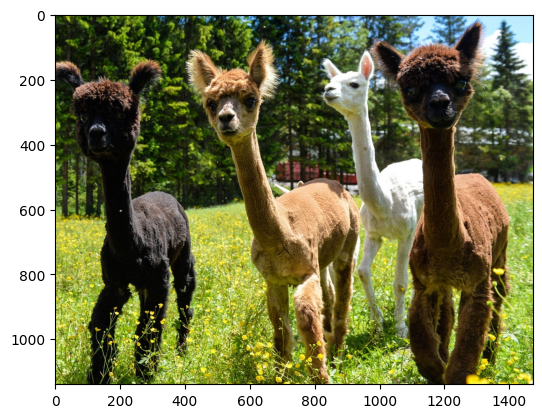

In [55]:
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread("alpacas.jpg")
plt.imshow(img)

# Exercise 1

## Exercise 1.1

- What type of object is it?

In [56]:
type(img)

numpy.ndarray

- What is its shape?

In [57]:
img.shape

(1139, 1472, 3)

- How many dimensions does it have? Can you explain what each dimension represents?

3 dimensions

RGB - Red, Green, Blue


- What is its smallest value and its largest value?

In [58]:
print(img.max())
print(img.min())

255
0


 - What is the data type?

In [59]:
# printed first pixel info
print(img.dtype)
img[0][0]

uint8


array([24, 39, 10], dtype=uint8)

## Exercise 1.2

 For the following exercises manipulate **img** using array **indexing** and **slicing** and then
 display the resulting image using **plt.imshow()**:

- First 500 rows of the image

(500, 1472, 3)


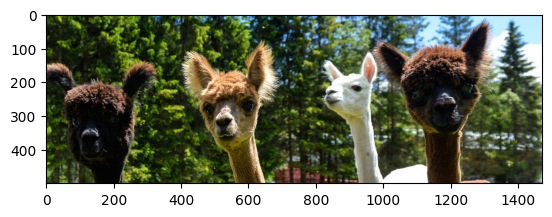

In [60]:
img_first500r = img[0:500]
print(img_first500r.shape)
plt.imshow(img_first500r)

- Last 500 columns of of the image

(1139, 500, 3)


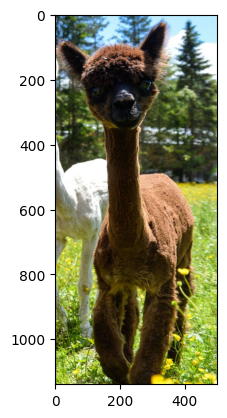

In [61]:
img_last500c = img[:,-500:]
print(img_last500c.shape)
plt.imshow(img_last500c)

- Every second row of the image

(570, 1472, 3)


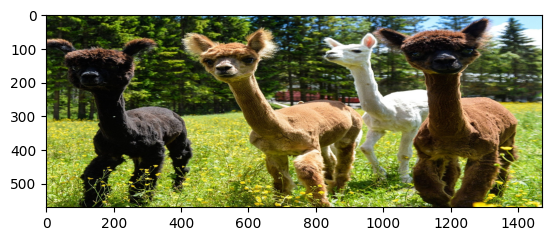

In [62]:
img_evsndrow = img[::2]
print(img_evsndrow.shape)
plt.imshow(img_evsndrow)

- Zoom in appropriately to display just the head of the cutest alpaca

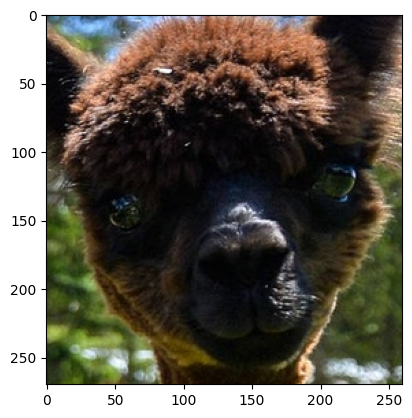

In [63]:
img_cutest = img[95:365, 1040:1300]
plt.imshow(img_cutest)

- Turn the image upside down

(1139, 1472, 3)


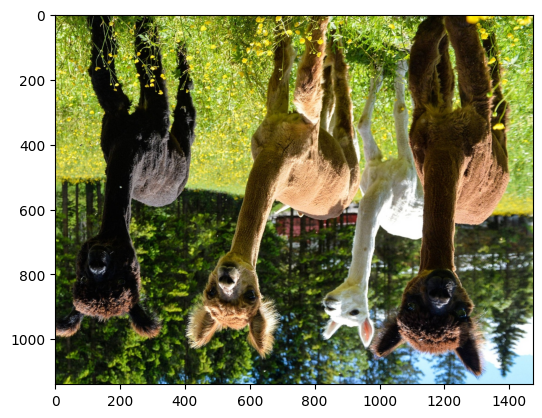

In [64]:
img_updown = img[::-1]
print(img_updown.shape)
plt.imshow(img_updown)

- Turn the image left to right

(1139, 1472, 3)


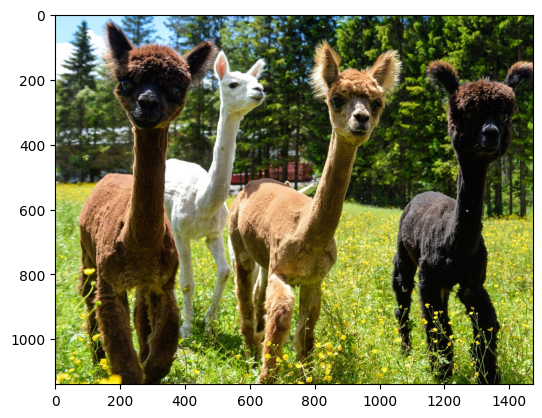

In [65]:
img_l2r = img[:,::-1]
print(img_l2r.shape)
plt.imshow(img_l2r)

- How can you pixelate the image, i.e. make the image look like a low-resolution image?

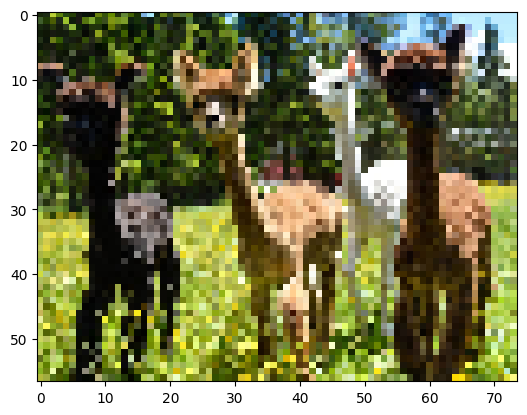

In [66]:
scale_factor = 20
img_big = img[::scale_factor, ::scale_factor]
plt.imshow(img_big)

## Exercise 1.3

As you may have found out by now, the image is made up of three color channels: red,
 green, and blue. Each of the channels is represented by a 2-dimensional array. See for
 instance this [picture](https://brohrer.github.io/images/image_processing/rgb_arrays.png) 
 for an illustration. Your task is now to change colors in the following
 way:

 <img height="400px" src="https://brohrer.github.io/images/image_processing/rgb_arrays.png"/>


- Set all values that are smaller than 100 to 0 and display the resulting image.

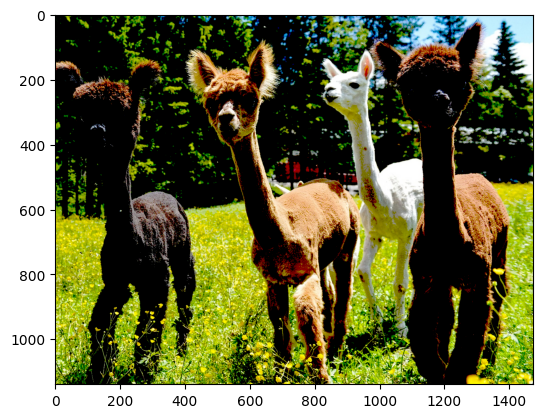

In [67]:
img_v2zero = img.copy()
img_v2zero = np.where(img_v2zero < 100, 0, img_v2zero)
plt.imshow(img_v2zero)

 - Set all values of the green and blue channels to 0 and display the resulting image. 
 Hint: you need to create a copy of the original image first (e.g. new_img = img.copy()) because the original image is immutable.

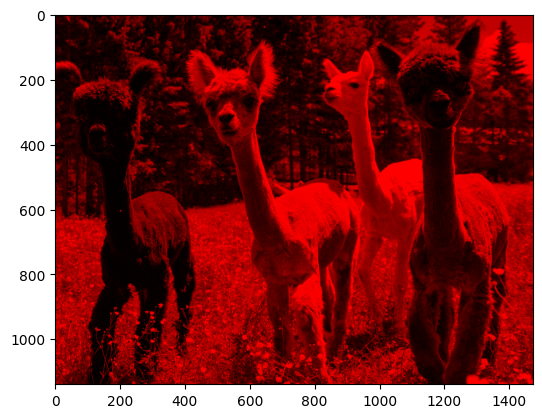

In [68]:
img_red = img.copy()

img_red[:,:,1] = 0
img_red[:,:,2] = 0

plt.imshow(img_red)

- Using slicing, select a rectangle that covers the head of the pandas, and try to change its color to black. How do you need to change the values of the red, green, and blue channels to achieve this?

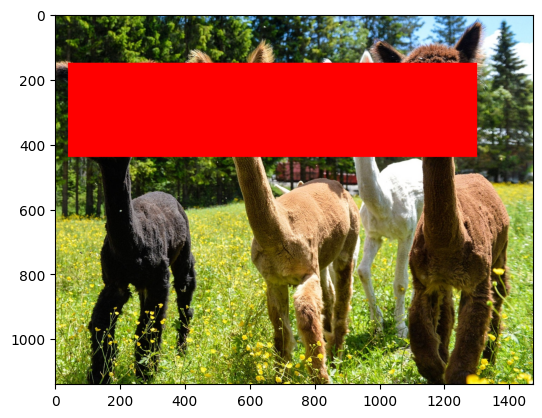

In [69]:
img_bkheads = img.copy()

img_bkheads[150:440,40:1300,0] = 255
img_bkheads[150:440,40:1300,1] = 0
img_bkheads[150:440,40:1300,2] = 0

plt.imshow(img_bkheads)

# Exercise 2

## Exercise 2.1

In [70]:
import pandas as pd
grades_df = pd.read_csv('grades.csv', index_col=0)
grades = grades_df.to_numpy()

In [71]:
grades

array([[80, 60, 70],
       [90, 80, 85],
       [70, 50, 70]])

In [72]:
grades_df

,task1,task2,task3
name,,,
Anna,80,60,70
Berta,90,80,85
Chris,70,50,70


 - Display both grades_df and grades. How do they differ?

grades_df is a pandas DataFrame, grades is a numpy array

- What is the average grade of all students and tasks?

In [73]:
grades.mean()

np.float64(72.77777777777777)

- What is the average grade per student?

In [74]:
grades.mean(axis=1)

array([70.        , 85.        , 63.33333333])

- What is the average grade per task?

In [75]:
grades.mean(axis=0)

array([80.        , 63.33333333, 75.        ])

- What is the median grade per task?

In [76]:
np.median(grades, axis=0)

array([80., 60., 70.])

## Exercise 2.2

The teacher needs to make several adjustments to the grades. Adjust the array according
 to the following instructions:

- Anna achieved 72 points rather than 70 in task 3.
- The teacher gives extra 5 bonus points for each student and each task.
- The teacher gives additional 3 points to each of the tasks carried out by Berta.
- The teacher raises the grade by 10 points whenever the grade is smaller or equal to
 80 points.

In [77]:
grades_df

,task1,task2,task3
name,,,
Anna,80,60,70
Berta,90,80,85
Chris,70,50,70


- Anna achieved 72 points rather than 70 in task 3.

In [78]:
grades[0][2] = 72
grades

array([[80, 60, 72],
       [90, 80, 85],
       [70, 50, 70]])

- The teacher gives extra 5 bonus points for each student and each task.

In [79]:
grades += 5
grades

array([[85, 65, 77],
       [95, 85, 90],
       [75, 55, 75]])

 - The teacher gives additional 3 points to each of the tasks carried out by Berta.

In [80]:
grades[1] += 3
grades

array([[85, 65, 77],
       [98, 88, 93],
       [75, 55, 75]])

- The teacher raises the grade by 10 points whenever the grade is smaller or equal to 80 points.

In [81]:
grades[grades <= 80] += 10
grades

array([[85, 75, 87],
       [98, 88, 93],
       [85, 65, 85]])

## Exercise 2.3

 The students’ final grades are calculated by weighing task 1 with 50% and task 2 with
 35% and task 3 with 15%. Use matrix multiplication to calculate the students’ final
 grades.

In [82]:
grades @ [0.50, 0.35, 0.15]

array([81.8 , 93.75, 78.  ])